Nicholas De Santos

DSC 680

Final Project 3

Hate Crimes in the US

# Background/History and our Business Problem

    According to recent FBI reports, dat from as recent as 2022 tells us that the current rate of hate crimes in the 
    country has been increasing in the past years (2022 FBI hate crimes statistics 2023). Race related hate crimes are 
    among the highest rate of hate crimes committed in the country with religion and anti-LGBTQ hate crimes being other 
    major motivations for such crimes as well. Hate crimes are both a social as well as a political problem. While a lot 
    of hate crimes are politically motivated, above everything else, they are still crimes that affect society as a whole. 
    For that reason, we dive into our investigation.

    The main problem that we want to investigate during this research project is to have some sort of analysis of hate 
    crimes being committed in the USA. We want to be able to answer questions such as the following:

    What are the different motivations for hate crimes?
    Is there one type of hate crime more common than others?
    Are there any trends in hate crimes in the country? (increasing? decreasing? Who is safe and who isn’t)
    What type of hate crimes are most common and where? (if specific locations apply)

    We also want to be able to create a model to determine what type of hate crime is most likely to happen given specific 
    conditions in order to get a better idea of hate crime demographics in the future.


# Data Explanation (Data Prep, Data Dictionary, etc)

    The data that we will be using a data set found on Kaggle.com titled "hate_crime_usa". 
    The data set contains information and records for 209442 different hate crimes that have been reported by the FBI. 
    It's important to note that hate crimes and crime in general tends to have a hidden figure, often refered to the 
    "dark figure of crime". A lot of crime, espeicially crimes towards marginalized communties often go unreported due 
    to the lack of support those communities face.
    
    Originally, our data set contains 28 different varaibles. 
    
    INCIDENT_ID--------------Identifying number given to each incident report
    DATA_YEAR----------------The year of the incident report
    ORI----------------------Organization Record Identifier
    PUB_AGENCY_NAME----------Public agency name in which the crime was reported
    PUB_AGENCY_UNIT----------Unit of that public agency
    STATE_ABBR---------------State abbrivation of the incident
    STATE_NAME---------------Full name of the state in which the indicent happened
    DIVISION_NAME------------Name of the division in which the incident was reported
    REGION_NAME--------------The region of the country
    POPULATION_GROUP_CODE----Population assigned descriptions
    POPULATION_GROUP_DESC----Generic size of the population
    INCIDENT_DATE------------Date of the Incident
    ADULT_VICTIM_COUNT-------Amount of Adult Victims
    JUVENILE_VICTIM_COUNT----Amount of Minor Victimes
    TOTAL_OFFENDER_COUNT-----Amount of Offenders
    ADULT_OFFENDER_COUNT-----Amount of Adult Offenders
    JUVENILE_OFFENDER_COUNT--Amount of Minor Offenders
    OFFENDER_RACE------------Race of the Offender
    OFFENDER_ETHNICITY-------Ethnicity of Offender
    VICTIM_COUNT-------------Amount of Victims
    OFFENSE_NAME-------------Name of the Offfense
    TOTAL_INDIVIDUAL_VICTIMS-Total individual Victim Count
    LOCATION_NAME------------Location type of incident
    BIAS_DESC----------------Reason for Hate Crime (Marginalized Group_
    VICTIM_TYPES-------------Type of Victim (individual, group, organization etc.)
    MULTIPLE_OFFENSE---------Offender committed multiple offenses? (Singular or Multiple)
    MULTIPLE_BIAS------------Offender committed crime based on multiple biases? (Singular or Multiple)

    
### Importing Data and Main Packages

    Before we can begin to build our model we must first load our data. A view of what the data looks like can be found 
    in the appendix at the end of this report. Our data will be saved into a dataframe object 'drugdata'.

In [2]:
#Importing Data and Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

hcrime = pd.read_csv('hate_crime.csv')
hcrime = pd.DataFrame(hcrime)
orig_data = hcrime
hcrime

C:\Users\nickx\AppData\Local\Temp\ipykernel_6864\1073563014.py:6: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  hcrime = pd.read_csv('hate_crime.csv')


,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,...,OFFENDER_RACE,OFFENDER_ETHNICITY,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
0,3015,1991,AR0040200,Rogers,NaN,City,AR,Arkansas,West South Central,South,...,White,NaN,1,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S
1,3016,1991,AR0290100,Hope,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S
2,43,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
3,44,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
4,3017,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,Service/Gas Station,Anti-White,Individual,S,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209437,558879,2019,WY0010100,Laramie,NaN,City,WY,Wyoming,Mountain,West,...,Unknown,Unknown,1,Intimidation,1.0,Government/Public Building,Anti-Gay (Male),Individual,S,S
209438,558880,2019,WY0010200,University of Wyoming,NaN,University or College,WY,Wyoming,Mountain,West,...,Multiple,Multiple,1,Destruction/Damage/Vandalism of Property,NaN,School-College/University,Anti-Black or African American,Other,S,S
209439,661208,2019,WY0150100,Cody,NaN,City,WY,Wyoming,Mountain,West,...,American Indian or Alaska Native,Not Hispanic or Latino,1,All Other Larceny,1.0,Parking/Drop Lot/Garage,"Anti-Multiple Races, Group",Individual,S,S
209440,463806,2019,WY0170100,Sheridan,NaN,City,WY,Wyoming,Mountain,West,...,American Indian or Alaska Native,Not Hispanic or Latino,2,Destruction/Damage/Vandalism of Property;Simpl...,2.0,Residence/Home,Anti-Other Race/Ethnicity/Ancestry,Individual,M,S


### Examining and Cleaning Data

    Once our data has been loaded and saved in a dataframe, we can start examining the data more closely. Then we can 
    see what we need to do in order to clean and prepare the data for our analysis.
    
    The first thing that we did was get rid of a few varaibles. The variables we chose to get rid of were eitehr redundant, 
    not useful for our investigation, or simply didn't make sense to keep in our model based on our analysis goals. The 
    varaibles we chose to get rid of were the following:
    
    PUB_AGENCY_NAME, PUB_AGENCY_UNIT, AGENCY_TYPE_NAME, DIVISION_NAME, POPULATION_GROUP_CODE, INCIDENT_DATE, 
    ADULT_VICTIM_COUNT, JUVENILE_VICTIM_COUNT, ADULT_OFFENDER_COUNT, ORI, JUVENILE_OFFENDER_COUNT, OFFENDER_ETHNICITY,
    TOTAL_INDIVIDUAL_VICTIMS, and INCIDENT_ID.

In [3]:
#Getting rid of columns we aren't interested in:

hcrime = hcrime.drop(['PUB_AGENCY_NAME', 'PUB_AGENCY_UNIT', 'AGENCY_TYPE_NAME', 'DIVISION_NAME', 'POPULATION_GROUP_CODE',
                     'INCIDENT_DATE', 'ADULT_VICTIM_COUNT', 'JUVENILE_VICTIM_COUNT', 'ADULT_OFFENDER_COUNT', 'ORI',
                     'JUVENILE_OFFENDER_COUNT', 'OFFENDER_ETHNICITY', 'TOTAL_INDIVIDUAL_VICTIMS', 'INCIDENT_ID'], axis=1)
hcrime

,DATA_YEAR,STATE_ABBR,STATE_NAME,REGION_NAME,POPULATION_GROUP_DESC,TOTAL_OFFENDER_COUNT,OFFENDER_RACE,VICTIM_COUNT,OFFENSE_NAME,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
0,1991,AR,Arkansas,South,"Cities from 10,000 thru 24,999",1,White,1,Intimidation,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S
1,1991,AR,Arkansas,South,"Cities from 2,500 thru 9,999",1,Black or African American,1,Simple Assault,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S
2,1991,AR,Arkansas,South,"Cities from 50,000 thru 99,999",1,Black or African American,1,Aggravated Assault,Residence/Home,Anti-Black or African American,Individual,S,S
3,1991,AR,Arkansas,South,"Cities from 50,000 thru 99,999",1,Black or African American,2,Aggravated Assault;Destruction/Damage/Vandalis...,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
4,1991,AR,Arkansas,South,"Cities from 50,000 thru 99,999",1,Black or African American,1,Aggravated Assault,Service/Gas Station,Anti-White,Individual,S,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209437,2019,WY,Wyoming,West,"Cities from 25,000 thru 49,999",0,Unknown,1,Intimidation,Government/Public Building,Anti-Gay (Male),Individual,S,S
209438,2019,WY,Wyoming,West,"Cities under 2,500",4,Multiple,1,Destruction/Damage/Vandalism of Property,School-College/University,Anti-Black or African American,Other,S,S
209439,2019,WY,Wyoming,West,"Cities from 2,500 thru 9,999",1,American Indian or Alaska Native,1,All Other Larceny,Parking/Drop Lot/Garage,"Anti-Multiple Races, Group",Individual,S,S
209440,2019,WY,Wyoming,West,"Cities from 10,000 thru 24,999",1,American Indian or Alaska Native,2,Destruction/Damage/Vandalism of Property;Simpl...,Residence/Home,Anti-Other Race/Ethnicity/Ancestry,Individual,M,S


    In addition to getting rid on unecessary columns, we also want to double check that there are no duplicates or 
    missing values in our data.

In [4]:
#Cleaning data: Rid of duplicates and missing values

hcrime = hcrime.drop_duplicates()
hcrime = hcrime.dropna()
hcrime

,DATA_YEAR,STATE_ABBR,STATE_NAME,REGION_NAME,POPULATION_GROUP_DESC,TOTAL_OFFENDER_COUNT,OFFENDER_RACE,VICTIM_COUNT,OFFENSE_NAME,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
0,1991,AR,Arkansas,South,"Cities from 10,000 thru 24,999",1,White,1,Intimidation,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S
1,1991,AR,Arkansas,South,"Cities from 2,500 thru 9,999",1,Black or African American,1,Simple Assault,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S
2,1991,AR,Arkansas,South,"Cities from 50,000 thru 99,999",1,Black or African American,1,Aggravated Assault,Residence/Home,Anti-Black or African American,Individual,S,S
3,1991,AR,Arkansas,South,"Cities from 50,000 thru 99,999",1,Black or African American,2,Aggravated Assault;Destruction/Damage/Vandalis...,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
4,1991,AR,Arkansas,South,"Cities from 50,000 thru 99,999",1,Black or African American,1,Aggravated Assault,Service/Gas Station,Anti-White,Individual,S,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209437,2019,WY,Wyoming,West,"Cities from 25,000 thru 49,999",0,Unknown,1,Intimidation,Government/Public Building,Anti-Gay (Male),Individual,S,S
209438,2019,WY,Wyoming,West,"Cities under 2,500",4,Multiple,1,Destruction/Damage/Vandalism of Property,School-College/University,Anti-Black or African American,Other,S,S
209439,2019,WY,Wyoming,West,"Cities from 2,500 thru 9,999",1,American Indian or Alaska Native,1,All Other Larceny,Parking/Drop Lot/Garage,"Anti-Multiple Races, Group",Individual,S,S
209440,2019,WY,Wyoming,West,"Cities from 10,000 thru 24,999",1,American Indian or Alaska Native,2,Destruction/Damage/Vandalism of Property;Simpl...,Residence/Home,Anti-Other Race/Ethnicity/Ancestry,Individual,M,S


    In this next portion of the code we want to see all the different unique values for each of the categorical
    variables, which would be all of our predicting varaibles. This will help us decide if there are any other varaibles
    that we might want to consider getting rid of before moving onto our model-building process. We can also get an idea
    of all the different types of unique values for each variable as well as the spread in terms of frequency of those
    values.

In [5]:
#Unique Values for STATE_ABBR
print(hcrime['STATE_ABBR'].value_counts())

STATE_ABBR
CA    27724
NJ    12013
MI    10627
MA     9028
NY     8488
OH     7438
WA     7411
TX     7270
AZ     5663
VA     4991
IL     4838
FL     4583
MN     4133
MD     3953
OR     3930
CO     3887
TN     3713
CT     3347
KY     3075
MO     2843
PA     2795
NC     2365
SC     1916
IN     1756
KS     1631
UT     1595
NV     1518
WI     1439
DC     1356
OK     1302
ME     1176
ID     1171
AR     1018
GA      963
NB      929
WV      863
RI      805
DE      797
IA      778
MT      651
NH      599
SD      542
NM      523
LA      512
VT      496
ND      406
AK      219
AL      205
MS      169
WY      142
HI       85
FS       79
GM        5
Name: count, dtype: int64


In [6]:
#Unique Values for STATE_NAME
print(hcrime['STATE_NAME'].value_counts())

STATE_NAME
California              27724
New Jersey              12013
Michigan                10627
Massachusetts            9028
New York                 8488
Ohio                     7438
Washington               7411
Texas                    7270
Arizona                  5663
Virginia                 4991
Illinois                 4838
Florida                  4583
Minnesota                4133
Maryland                 3953
Oregon                   3930
Colorado                 3887
Tennessee                3713
Connecticut              3347
Kentucky                 3075
Missouri                 2843
Pennsylvania             2795
North Carolina           2365
South Carolina           1916
Indiana                  1756
Kansas                   1631
Utah                     1595
Nevada                   1518
Wisconsin                1439
District of Columbia     1356
Oklahoma                 1302
Maine                    1176
Idaho                    1171
Arkansas                 1018

In [7]:
#Unique Values for REGION_NAME
print(hcrime['REGION_NAME'].value_counts())

REGION_NAME
West                54519
South               39051
Northeast           38747
Midwest             37360
Other                  79
U.S. Territories        5
Name: count, dtype: int64


In [8]:
#Unique Values for POPULATION_GROUP_DESC
print(hcrime['POPULATION_GROUP_DESC'].value_counts())

POPULATION_GROUP_DESC
Cities from 50,000 thru 99,999                                                     20079
Cities from 25,000 thru 49,999                                                     19254
Cities 1,000,000 or over                                                           18775
Cities from 100,000 thru 249,999                                                   17756
Cities from 500,000 thru 999,999                                                   17515
Cities from 10,000 thru 24,999                                                     16755
MSA counties 100,000 or over                                                       14030
Cities from 250,000 thru 499,999                                                   13257
Cities from 2,500 thru 9,999                                                       10886
Cities under 2,500                                                                  9103
MSA counties from 25,000 thru 99,999                                                4983

In [9]:
#Unique Values for OFFENDER_RACE
print(hcrime['OFFENDER_RACE'].value_counts())

OFFENDER_RACE
White                                        71449
Unknown                                      67299
Black or African American                    24269
Multiple                                      4092
Asian                                         1474
American Indian or Alaska Native              1127
Native Hawaiian or Other Pacific Islander       51
Name: count, dtype: int64


In [10]:
#Unique Values for OFFENSE_NAME
print(hcrime['OFFENSE_NAME'].value_counts())

OFFENSE_NAME
Intimidation                                                                                         47673
Destruction/Damage/Vandalism of Property                                                             45808
Simple Assault                                                                                       34947
Aggravated Assault                                                                                   19735
Robbery                                                                                               3364
                                                                                                     ...  
Intimidation;Motor Vehicle Theft;Robbery;Simple Assault                                                  1
Aggravated Assault;Destruction/Damage/Vandalism of Property;Fondling                                     1
Destruction/Damage/Vandalism of Property;Intimidation;Theft of Motor Vehicle Parts or Accessories        1
Burglary/Breaking & Ente

In [11]:
#Unique Values for LOCATION_NAME
print(hcrime['LOCATION_NAME'].value_counts())

LOCATION_NAME
Residence/Home                                                              48166
Highway/Road/Alley/Street/Sidewalk                                          33496
Other/Unknown                                                               17201
School/College                                                              13587
Parking/Drop Lot/Garage                                                     11068
                                                                            ...  
Drug Store/Doctor's Office/Hospital;Parking/Drop Lot/Garage                     1
Convenience Store;Jail/Prison/Penitentiary/Corrections Facility                 1
Church/Synagogue/Temple/Mosque;Highway/Road/Alley/Street/Sidewalk               1
Government/Public Building;Jail/Prison/Penitentiary/Corrections Facility        1
Air/Bus/Train Terminal;School-Elementary/Secondary                              1
Name: count, Length: 123, dtype: int64


In [12]:
#Unique Values for BIAS_DESC
print(hcrime['BIAS_DESC'].value_counts())

BIAS_DESC
Anti-Black or African American                                                       54612
Anti-White                                                                           21373
Anti-Gay (Male)                                                                      18065
Anti-Jewish                                                                          15712
Anti-Hispanic or Latino                                                              12132
                                                                                     ...  
Anti-Arab;Anti-Asian;Anti-Black or African American                                      1
Anti-Male;Anti-Native Hawaiian or Other Pacific Islander                                 1
Anti-Mental Disability;Anti-Other Race/Ethnicity/Ancestry                                1
Anti-Gay (Male);Anti-Heterosexual                                                        1
Anti-Black or African American;Anti-Hispanic or Latino;Anti-Multiple Races, Grou

In [13]:
#Unique Values for VICTIM_TYPES
print(hcrime['VICTIM_TYPES'].value_counts())

VICTIM_TYPES
Individual                                               139461
Business                                                   7848
Other                                                      6741
Religious Organization                                     4555
Government                                                 4277
Society/Public                                             3272
Individual;Other                                            931
Business;Individual                                         778
Unknown                                                     720
Individual;Society/Public                                   342
Government;Individual                                       188
Individual;Religious Organization                           176
Law Enforcement Officer                                     117
Financial Institution                                        89
Individual;Unknown                                           50
Business;Government        

In [14]:
#Unique Values for MULTIPLE_OFFENSE
print(hcrime['MULTIPLE_OFFENSE'].value_counts())

MULTIPLE_OFFENSE
S    161291
M      8470
Name: count, dtype: int64


In [15]:
#Unique Values for MULTIPLE_BIAS
print(hcrime['MULTIPLE_BIAS'].value_counts())

MULTIPLE_BIAS
S    169124
M       637
Name: count, dtype: int64


In [16]:
#Getting rid of "noise": Getting rid of crime location that happened less than 100 times from 1991 to 2019

# Get the frequency of each value in the 'A' column
counts = hcrime['LOCATION_NAME'].value_counts()

# Remove observations with frequency of 1
hcrime = hcrime[~hcrime['LOCATION_NAME'].isin(counts[counts <= 100].index)]
print(hcrime['LOCATION_NAME'].value_counts())

LOCATION_NAME
Residence/Home                                   48166
Highway/Road/Alley/Street/Sidewalk               33496
Other/Unknown                                    17201
School/College                                   13587
Parking/Drop Lot/Garage                          11068
Church/Synagogue/Temple/Mosque                    6369
Commercial/Office Building                        4371
Restaurant                                        4087
Bar/Nightclub                                     3635
Government/Public Building                        2835
Convenience Store                                 2606
Specialty Store                                   2220
School-Elementary/Secondary                       2132
Field/Woods                                       1935
Air/Bus/Train Terminal                            1919
Service/Gas Station                               1879
Grocery/Supermarket                               1687
Department/Discount Store                         1

In [17]:
#Getting rid of "noise": Getting rid of offenses that happened less than 100 times from 1991 to 2019

# Get the frequency of each value in the 'A' column
counts = hcrime['OFFENSE_NAME'].value_counts()

# Remove observations with frequency of 1
hcrime = hcrime[~hcrime['OFFENSE_NAME'].isin(counts[counts <= 100].index)]
print(hcrime['OFFENSE_NAME'].value_counts())

OFFENSE_NAME
Intimidation                                                             47449
Destruction/Damage/Vandalism of Property                                 45656
Simple Assault                                                           34788
Aggravated Assault                                                       19682
Robbery                                                                   3359
Burglary/Breaking & Entering                                              2597
Destruction/Damage/Vandalism of Property;Intimidation                     1686
All Other Larceny                                                         1641
Arson                                                                     1071
Intimidation;Simple Assault                                                828
Drug/Narcotic Violations                                                   758
Not Specified                                                              637
Theft From Motor Vehicle               

In [18]:
#Getting rid of "noise": Getting rid of offenses that happened less than 100 times from 1991 to 2019

# Get the frequency of each value in the 'A' column
counts = hcrime['OFFENSE_NAME'].value_counts()

# Remove observations with frequency of 1
hcrime = hcrime[~hcrime['OFFENSE_NAME'].isin(counts[counts <= 100].index)]
print(hcrime['OFFENSE_NAME'].value_counts())

OFFENSE_NAME
Intimidation                                                             47449
Destruction/Damage/Vandalism of Property                                 45656
Simple Assault                                                           34788
Aggravated Assault                                                       19682
Robbery                                                                   3359
Burglary/Breaking & Entering                                              2597
Destruction/Damage/Vandalism of Property;Intimidation                     1686
All Other Larceny                                                         1641
Arson                                                                     1071
Intimidation;Simple Assault                                                828
Drug/Narcotic Violations                                                   758
Not Specified                                                              637
Theft From Motor Vehicle               

    We use the results above to first decide to get rid of one of the state columns since they both say the same thing. We 
    also decide that we want to get rid of the instances of multiple bias offenses since we want to be able to predict just 
    one type of bias. On top of that we decide to get rid of a few observations to not only make each category more balanced 
    but to make sure that the variables that we do use have a significant amount of observation per cateogry. For example, 
    we wouldn't want to concern ourselves too much with offenses that don't happen as often. We have to consider that these 
    incident reports are crimes reported within the last 30+ years. Meaning that crimes that happened less than 100 times 
    in that span of time would have only occured about 3 times a year.

In [19]:
hcrime = hcrime.drop(['STATE_NAME'], axis=1)

# Drop all rows where MULTIPLE_BIAS = M
hcrime = hcrime.drop(hcrime[hcrime['MULTIPLE_BIAS'] == 'M'].index)

#Drop MULTIPLE_BIAS since we now know there is only singular bias for each observation
hcrime = hcrime.drop(['MULTIPLE_BIAS'], axis=1)
hcrime

,DATA_YEAR,STATE_ABBR,REGION_NAME,POPULATION_GROUP_DESC,TOTAL_OFFENDER_COUNT,OFFENDER_RACE,VICTIM_COUNT,OFFENSE_NAME,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE
0,1991,AR,South,"Cities from 10,000 thru 24,999",1,White,1,Intimidation,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S
1,1991,AR,South,"Cities from 2,500 thru 9,999",1,Black or African American,1,Simple Assault,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S
2,1991,AR,South,"Cities from 50,000 thru 99,999",1,Black or African American,1,Aggravated Assault,Residence/Home,Anti-Black or African American,Individual,S
3,1991,AR,South,"Cities from 50,000 thru 99,999",1,Black or African American,2,Aggravated Assault;Destruction/Damage/Vandalis...,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M
4,1991,AR,South,"Cities from 50,000 thru 99,999",1,Black or African American,1,Aggravated Assault,Service/Gas Station,Anti-White,Individual,S
...,...,...,...,...,...,...,...,...,...,...,...,...
209437,2019,WY,West,"Cities from 25,000 thru 49,999",0,Unknown,1,Intimidation,Government/Public Building,Anti-Gay (Male),Individual,S
209438,2019,WY,West,"Cities under 2,500",4,Multiple,1,Destruction/Damage/Vandalism of Property,School-College/University,Anti-Black or African American,Other,S
209439,2019,WY,West,"Cities from 2,500 thru 9,999",1,American Indian or Alaska Native,1,All Other Larceny,Parking/Drop Lot/Garage,"Anti-Multiple Races, Group",Individual,S
209440,2019,WY,West,"Cities from 10,000 thru 24,999",1,American Indian or Alaska Native,2,Destruction/Damage/Vandalism of Property;Simpl...,Residence/Home,Anti-Other Race/Ethnicity/Ancestry,Individual,M


### Data Exploration:

    Now, from the cleaning phase of our analysis we move onto our data exploration phase. Here we look at the distribution 
    of different cateogircal variables including our target varaible for our analaysis. In total we looked at seven 
    differentcategorical varaible pie charts but for our analysis here we only include one pie chart for our target 
    varaiable (OFFENSE_NAME) and two pie charts for two of our predicting varaibles (LOCATION_NAME and BIAS_DESC). The 
    remaining pie charts can be found in our appendix, although the results will be written bellow the visuals.

    In addition to exploring our cateogrical variables, we also look at the incident report numbers over the years on a 
    histogram where we can see the amount of hate crimes committed each year.

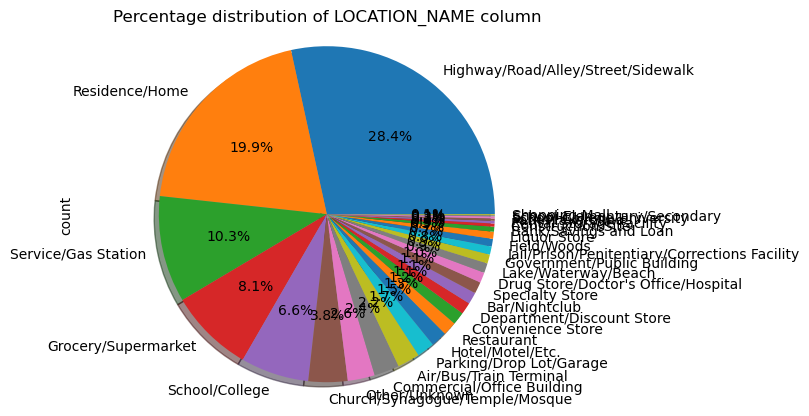

In [20]:
#Percentage Pie Chart of Crime Rates in different locations
counts = hcrime['LOCATION_NAME'].value_counts()
labels = hcrime.LOCATION_NAME.unique()
counts.plot.pie(autopct='%1.1f%%', labels= labels, shadow=True)

plt.title('Percentage distribution of LOCATION_NAME column')

plt.axis('equal')
plt.show()

    Here we can see that the majority of hate crimes out of the incidents reported occured on some kind of highway, road 
    alleyway or sidewalk. More than a quarter to be exact.

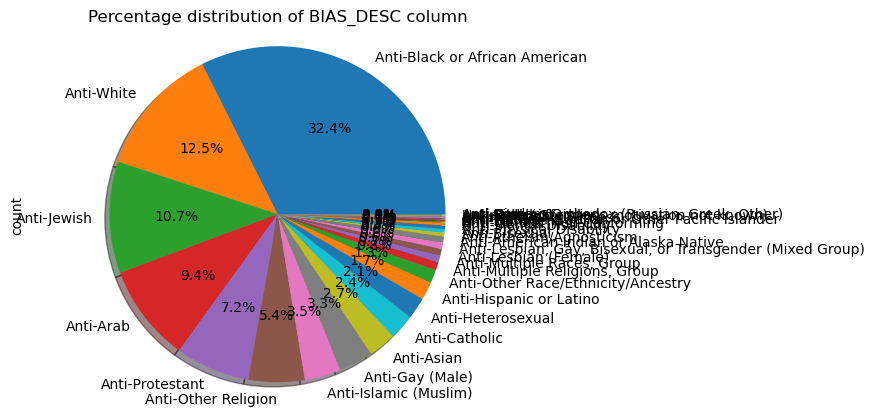

In [21]:
#Percentage Pie Chart of Crime Rates in different bias descriptions
counts = hcrime['BIAS_DESC'].value_counts()
labels = hcrime.BIAS_DESC.unique()
counts.plot.pie(autopct='%1.1f%%', labels= labels, shadow=True)

plt.title('Percentage distribution of BIAS_DESC column')

plt.axis('equal')
plt.show()

    In terms of bias description, in other words, what type of marginalized group was victimized by the hate crime,
    the most common biases are anti black/african american and anti-white which is consistent with our back ground
    research telling us that the most common motivation for hate crimes is race related.

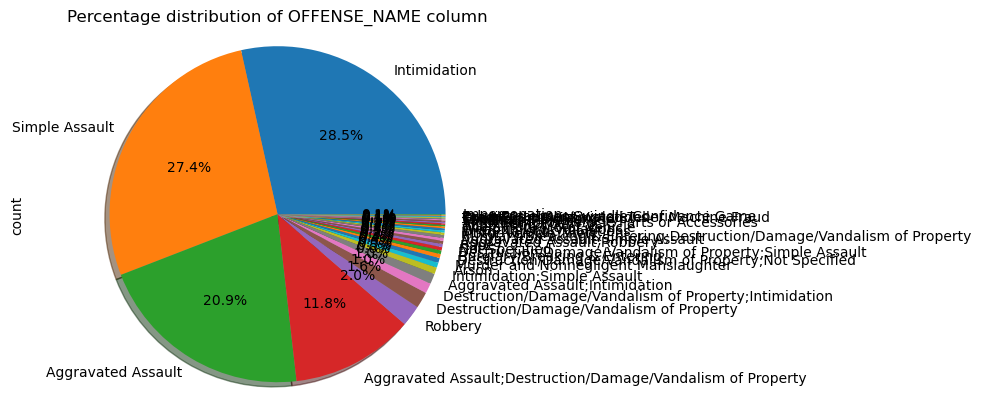

In [22]:
#Percentage Pie Chart of Crime Rates in different bias descriptions
counts = hcrime['OFFENSE_NAME'].value_counts()
labels = hcrime.OFFENSE_NAME.unique()
counts.plot.pie(autopct='%1.1f%%', labels= labels, shadow=True)

plt.title('Percentage distribution of OFFENSE_NAME column')

plt.axis('equal')
plt.show()

    Here we look at our target varaible OFFENSE_NAME which is the type of offense that was committed. The most common
    being some form of assult or intimidation (verbal assault).

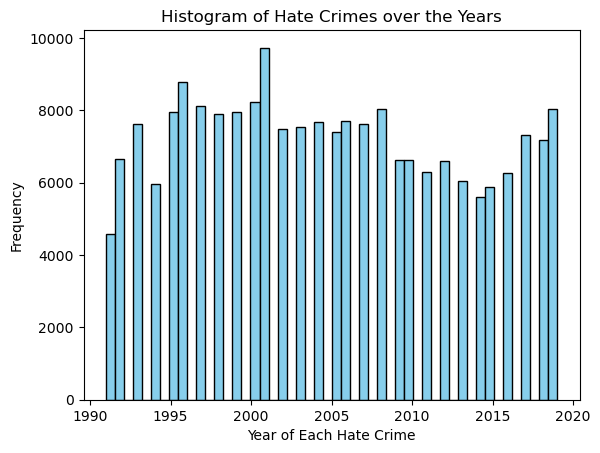

In [23]:
#Histogram Plot

plt.hist(orig_data.DATA_YEAR, bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Year of Each Hate Crime')
plt.ylabel('Frequency')
plt.title('Histogram of Hate Crimes over the Years')
plt.show()

    This last visual is just to show us how the rate of hate crimes has or hasn't been changing over the years. As you
    can see from the distogram above, it's clear that since around 2015, the amount of hate crimes committed in the 
    country has been increasing rather steadily, consistent with our prior findings as well. Now let's move onto our models.

# Methods

    The target variable that we are going to be concerned with is the offense name (OFFENSE_NAME) for the hate crime. It’s 
    also worth noting that since we’re going to be working with demographic information, we might need to bring other data 
    into the mix (possibly looking at race proportions of each state) to possibly determine whether demographic information 
    of a state can also shine like as to what hate crimes are most likely and provide information as to what states are and
    aren’t safe for specific marginalized groups of people. But once we have our desired data and predicting variables we 
    will likely use logistic regression since our target variable is a categorical variable.

    The first step in our analysis is variable selection, specifically choosing which varaibles we will be using as our 
    predicting varables. In the end we chose to to drop the following varaibles:

    DATA_YEAR, TOTAL_OFFENDER_COUNT, VICTIM_COUNT, OFFENSE_NAME, and MULTIPLE_OFFENSE.

    We drop the year of the indicent because we are not concerned with knowing the year. In the end we want to predict what 
    type of hate crime will be commited based on factors such as demogrpahic infomration. We drop the total offender count
    varaible because we are not concerned with how many offenders there we during an indicent, only whether or not that 
    incident occured and what happened. We drop the victim count because again we are only concerned with what happened, not 
    how many people it happened to. We drop the offense name varaible from this dataframe because this is our x (predictor)
    dataframe and OFFENSE_NAME is our target varaible. Lastly we drop, multiple offense varaible because we are only 
    concerned with incidents that were reported once.

# Analysis and Model Creation

In [24]:
#Variable selection
X_vars = hcrime.drop(['DATA_YEAR', 'TOTAL_OFFENDER_COUNT', 'VICTIM_COUNT', 'OFFENSE_NAME', 'MULTIPLE_OFFENSE'], axis=1)
X_vars

,STATE_ABBR,REGION_NAME,POPULATION_GROUP_DESC,OFFENDER_RACE,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES
0,AR,South,"Cities from 10,000 thru 24,999",White,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual
1,AR,South,"Cities from 2,500 thru 9,999",Black or African American,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual
2,AR,South,"Cities from 50,000 thru 99,999",Black or African American,Residence/Home,Anti-Black or African American,Individual
3,AR,South,"Cities from 50,000 thru 99,999",Black or African American,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual
4,AR,South,"Cities from 50,000 thru 99,999",Black or African American,Service/Gas Station,Anti-White,Individual
...,...,...,...,...,...,...,...
209437,WY,West,"Cities from 25,000 thru 49,999",Unknown,Government/Public Building,Anti-Gay (Male),Individual
209438,WY,West,"Cities under 2,500",Multiple,School-College/University,Anti-Black or African American,Other
209439,WY,West,"Cities from 2,500 thru 9,999",American Indian or Alaska Native,Parking/Drop Lot/Garage,"Anti-Multiple Races, Group",Individual
209440,WY,West,"Cities from 10,000 thru 24,999",American Indian or Alaska Native,Residence/Home,Anti-Other Race/Ethnicity/Ancestry,Individual


    After we have our desired predicting varaibles, since they are all categorical varaibles, we want to transform that 
    datasent into dummy varaibles in order to be able to use that data to train our future model. After which we are able 
    to get started with our model building process.

In [25]:
#change varaibles to dummy varaibles
X = pd.get_dummies(X_vars)
dummy_vars = X
X

,STATE_ABBR_AK,STATE_ABBR_AL,STATE_ABBR_AR,STATE_ABBR_AZ,STATE_ABBR_CA,STATE_ABBR_CO,STATE_ABBR_CT,STATE_ABBR_DC,STATE_ABBR_DE,STATE_ABBR_FL,...,VICTIM_TYPES_Individual;Religious Organization,VICTIM_TYPES_Individual;Society/Public,VICTIM_TYPES_Individual;Unknown,VICTIM_TYPES_Law Enforcement Officer,VICTIM_TYPES_Other,VICTIM_TYPES_Other;Religious Organization,VICTIM_TYPES_Religious Organization,VICTIM_TYPES_Religious Organization;Society/Public,VICTIM_TYPES_Society/Public,VICTIM_TYPES_Unknown
0,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209437,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
209438,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
209439,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
209440,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


    The first type of model that we try to create is a decision tree classifier. Since we are predicting a cateogricical 
    varaible with more than two cateogories, we are not able to use logistic regression for our model. Decision tree models 
    are also ideal when you have a lot or all cateogorical predicting varaibles as well. With this model we get an accuracy 
    of about 47.6% in our predictions.

In [26]:
#Splitting Training and Testing Sets and building Model

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

#split dataset in features and target variable
X =  X # Features
y = hcrime.OFFENSE_NAME # Target variable

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state= 1) # 95% training and 5% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [27]:
# Model Accuracy:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.47771084337349395


    Since we always want to strive for better accruacy, we next try a different model. A random forrest instead of a 
    singular decision tree. Here we get an accruacy of about 50% which is slightly better than our last model. We also 
    create a confusion matrix to show our results visually.

In [28]:
#Better Model Plan: Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [29]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5067469879518073


# Results

In [1]:
#creating confusion matrix

cm = metrics.confusion_matrix(y_test, y_pred)
cmp = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(10,8))
cmp.plot(ax=ax)

labels = hcrime['OFFENSE_NAME'].unique()
labels = pd.DataFrame(labels)
labels

NameError: name 'metrics' is not defined

# Conclusion

    Overall there were 33 different types of offenses possible so to be able to predict the type of offence at just above 
    50% accuracy with our model does seem better than not being able to make any type of guess. With our model, we are able 
    to predict the type of hate crime committed knowing the state the possible victim lives in, the region of the country, 
    size of the population of the city, the race of possible offender, the location of the possible victim, the minority 
    group the possible victim belongs to and whether the victim is an individual or group of people (whether they are safer 
    in numbers or not).

# Assumptions:

    In order to make any conclusions, we assume that this sample data can represent the whole of the united states and 
    that there is sufficent data from each state and region to make valid conclusions of our findings. As far as any model
    assumptions, decision trees/random forests are a non-parametric, non-statistical method that doesn't make assumptions 
    about the distribution, independence, or constant variance of training data or prediction residuals. They also don't 
    assume linearity in the data.

# Limitations:

    As far as limiations went, I think while this is the most data we have worked with as far as projects, there could have 
    been more data to fit our original plan. Originally, we only wanted to be concerned with hate crimes committed towards 
    individals, but getting rid of other victim types could have gotten rid of a few thousand observations so we decided to 
    keep all victim types and open that analysis. More data is always good in analysis. We are also limited by the dark 
    figure of crime, all the crimes that haven't been reported due to prejudice (for example, some people might be hesitant 
    to report rapes, or LGBT related crimes out of the fear of being exposed somehow). There is a lot to consider in that 
    aspect.

# Challenges:

    The main challenge I can see at this point is the vast amount of data (clearly in the tens of thousands in terms of 
    the dataset I currently what to use). With that comes a lot of challenges in regards to even just cleaning and 
    formatting the data.

# Future Uses/Additional Applications:

    The aim of this investigation is to be able to use this model in order to predict whether an individual (or any other 
    victim type in this case) based on the state they are in, region of the country, population size of location, the race 
    of possible offender (included as a demographic marker), type of location, and bias description (included as a 
    demographic marker). The varaibles included as demographic markers are to be able to tell us more about specific 
    situations. For example, knowing the offender race, gives us a clue for possible victims to avoid areas where residents 
    are predominantly that given race. The same goes for the bias description. This would give us a clue as to what 
    marginalized group is unsafe in that location.

    As far as recommendations go, I beleive that I would recommend is finding more data and possibly newer data as the data 
    set we used only has reported crimes up to the year 2019, missing the last five years of data which could be crucial 
    in reporting any trends in hate crime activity. Who knows if the last five years have changed a lot or not.

# Ethical Assessment

    As for ethical concerns, this is a pretty heavy topic having to do with actual victims. It can be a very traumatic 
    experience so it’s important to remember that this data represents actual events that happened to actual people. No 
    names are included in the data but there is plenty of personal information included so the data should be treated 
    with caution as always. Another thing to remember is that the findings of the investigation should be treated with
    skepticism as well as crime in general tends to have a hidden figure. Not all crimes are reported and documented 
    hence we can’t treat the data set as all the data of the population, only a representation.

# References

2022 FBI hate crimes statistics. Community Relations Service. (2023, October 30). https://www.justice.gov/crs/highlights/2022-hate-crime-statistics 

Jonathan. (2021, December 9). FBI hate crimes in USA (1991-2020). Kaggle. https://www.kaggle.com/datasets/jonathanrevere/fbi-hate-crimes-in-usa-19912020?select=Hate%2BCrimes%2Bin%2BAK%2B1991-2020.csv 

Sai, P. (2023, March 13). Hate_crime_usa. Kaggle. https://www.kaggle.com/datasets/pavansb/hate-crime-usa 


# Appendix


Table 1: Original Dataframe

In [31]:
orig_data

,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,...,OFFENDER_RACE,OFFENDER_ETHNICITY,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
0,3015,1991,AR0040200,Rogers,NaN,City,AR,Arkansas,West South Central,South,...,White,NaN,1,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S
1,3016,1991,AR0290100,Hope,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S
2,43,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
3,44,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
4,3017,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,Service/Gas Station,Anti-White,Individual,S,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209437,558879,2019,WY0010100,Laramie,NaN,City,WY,Wyoming,Mountain,West,...,Unknown,Unknown,1,Intimidation,1.0,Government/Public Building,Anti-Gay (Male),Individual,S,S
209438,558880,2019,WY0010200,University of Wyoming,NaN,University or College,WY,Wyoming,Mountain,West,...,Multiple,Multiple,1,Destruction/Damage/Vandalism of Property,NaN,School-College/University,Anti-Black or African American,Other,S,S
209439,661208,2019,WY0150100,Cody,NaN,City,WY,Wyoming,Mountain,West,...,American Indian or Alaska Native,Not Hispanic or Latino,1,All Other Larceny,1.0,Parking/Drop Lot/Garage,"Anti-Multiple Races, Group",Individual,S,S
209440,463806,2019,WY0170100,Sheridan,NaN,City,WY,Wyoming,Mountain,West,...,American Indian or Alaska Native,Not Hispanic or Latino,2,Destruction/Damage/Vandalism of Property;Simpl...,2.0,Residence/Home,Anti-Other Race/Ethnicity/Ancestry,Individual,M,S


Table 2: Dummy Variable transformation

In [32]:
dummy_vars

,STATE_ABBR_AK,STATE_ABBR_AL,STATE_ABBR_AR,STATE_ABBR_AZ,STATE_ABBR_CA,STATE_ABBR_CO,STATE_ABBR_CT,STATE_ABBR_DC,STATE_ABBR_DE,STATE_ABBR_FL,...,VICTIM_TYPES_Individual;Religious Organization,VICTIM_TYPES_Individual;Society/Public,VICTIM_TYPES_Individual;Unknown,VICTIM_TYPES_Law Enforcement Officer,VICTIM_TYPES_Other,VICTIM_TYPES_Other;Religious Organization,VICTIM_TYPES_Religious Organization,VICTIM_TYPES_Religious Organization;Society/Public,VICTIM_TYPES_Society/Public,VICTIM_TYPES_Unknown
0,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209437,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
209438,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
209439,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
209440,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Figure 1: Pie Chart of States

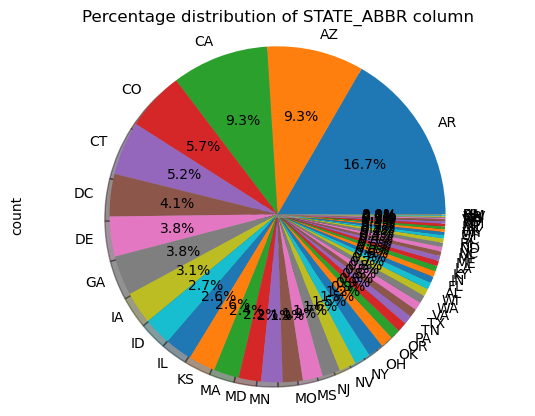

In [33]:
#Percentage Pie Chart of Crime Rates in different States
orig_data['STATE_ABBR'].value_counts()
counts = orig_data['STATE_ABBR'].value_counts()
labels = orig_data.STATE_ABBR.unique()
counts.plot.pie(autopct='%1.1f%%', labels= labels, shadow=True)

plt.title('Percentage distribution of STATE_ABBR column')

plt.axis('equal')
plt.show()

Figure 2: Pie Chart of Population Group Size

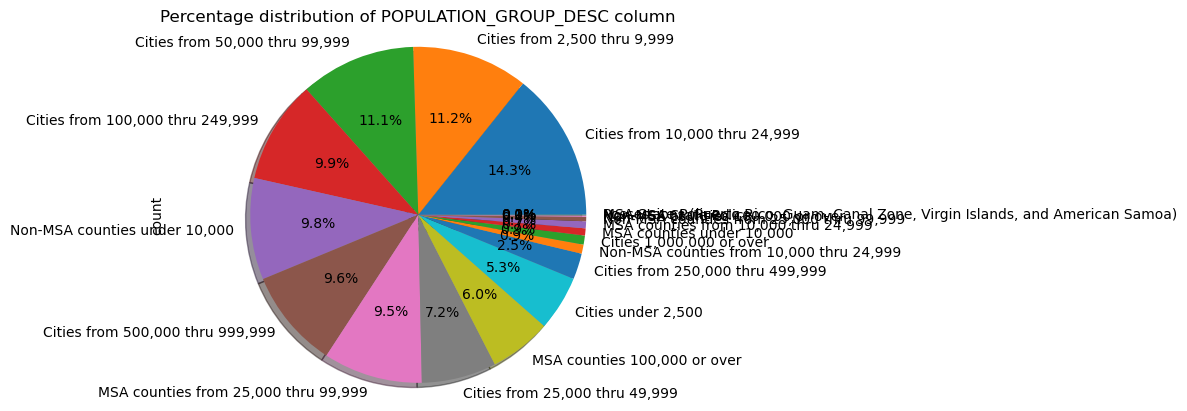

In [34]:
#Percentage Pie Chart of Crime Rates in different Population Sizes
counts = orig_data['POPULATION_GROUP_DESC'].value_counts()
labels = orig_data.POPULATION_GROUP_DESC.unique()
counts.plot.pie(autopct='%1.1f%%', labels= labels, shadow=True)

plt.title('Percentage distribution of POPULATION_GROUP_DESC column')

plt.axis('equal')
plt.show()

Figure 3: Pie Chart of Country Region Name

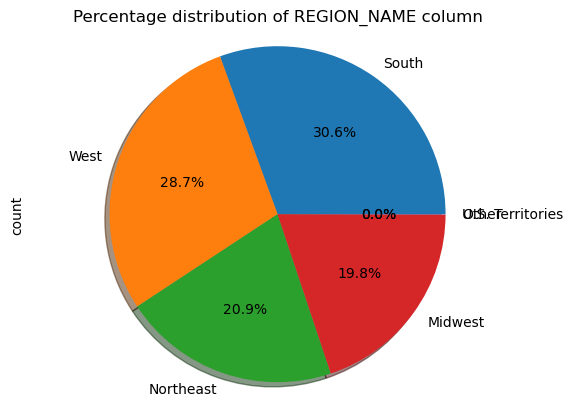

In [35]:
#Percentage Pie Chart of Crime Rates in different Regions
counts = orig_data['REGION_NAME'].value_counts()
labels = orig_data.REGION_NAME.unique()
counts.plot.pie(autopct='%1.1f%%', labels= labels, shadow=True)

plt.title('Percentage distribution of REGION_NAME column')

plt.axis('equal')
plt.show()

Figure 4: Pie Chart of Offender Race

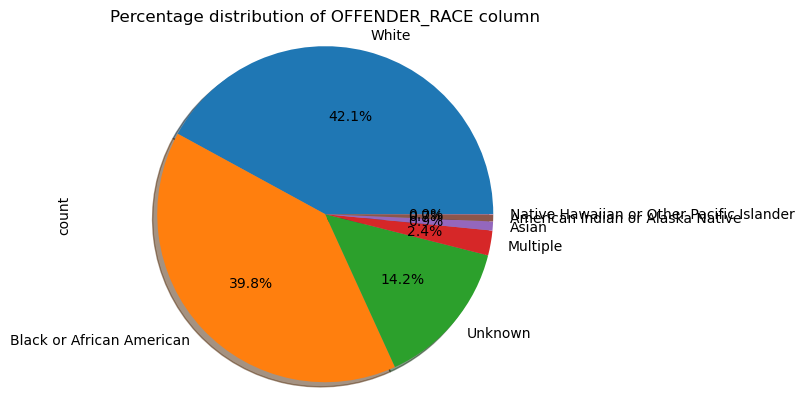

In [36]:
#Percentage Pie Chart of Crime Rates in different races
counts = hcrime['OFFENDER_RACE'].value_counts()
labels = hcrime.OFFENDER_RACE.unique()
counts.plot.pie(autopct='%1.1f%%', labels= labels, shadow=True)

plt.title('Percentage distribution of OFFENDER_RACE column')

plt.axis('equal')
plt.show()

# Audience Questions:

1. What was the main reason you chose this topic for your investigation?

    As I mentioned in the introduction to this project, hate crimes have both a social and political element to them.
    While they can be politically motivated, they are a reflection of our society regardless. Regardless of how you feel
    about yourself, other people will judge you whether you are part of any of those bias groups and it's important to
    know where you are safe in this country. That was the whole reason of this investigation.
    
2. Do you believe the data was adequate enough for your investigation and chosen research question?

    I believe that there was certainly enough data in the data set we found. There was enough and the right type of data
    to complete this project but I do think that different TYPES of data could have been helpful for the investigation.
    For example it would have been nice if the dataset included more balanced cateogories for cateogrical varaibles. It
    was clear that the data we worked with was somewhat "raw". It would have also been nice to have more demographic
    information about the location, city and state the incidents occured in to have a better profile for each location.
    
3. Would you have chosen a different question given the time and resources?

    I don't think I would have. I felt really passionate about this research topic and I do think that I executed it the
    way I wanted to and planned to for the most part.

4. If you had more time, what would you further investigate?

    I would definitely dive into more demographic information for each state, possibly create some kind of profile for
    each location as well. Perhaps looking into different races/ethnicities and their distribution in each state, looking
    at the regular crime rate in each state as well for reference, and things of that nature.

5. What ethical concerns did you need to consider?

    We need to be considerate that the data might not reflect the population as a whole. Each observations are considered
    willing participants. Each incident was reported. There are no crimes/indidents that no one had reported. We also
    acknowledge the sensitivity of the data. This is a serious topic in which real lives were impacted. Some of these
    incident reports can lead to serious trauma for the victims and it's important to appraoch with respect.

6. Was the large amount of data a problem or limiting factor in your investigation?

    It didn't feel like a problem. If anything it was an advantage to work with so much data because we were then able
    to narrow down the exact data we wanted to work with without sacrificing our sample size. In the end, after getting
    rid of a good amount of columns and rows, we still had sufficient data to work with and create our model.

7. If you could do anything differently about this project, what would it be and why?

    I honestly wouldn't change much about this project but if I could I would want to maybe expand the investigation to
    more areas of the world, not just the United States. But such an investigation would be difficult considering there
    are different procedures of reporting crimes and other conditions which are different country to country. It would be
    inconsident data collection.

8. What sort of application do you think your findings may have for society?

    Our findings can serve as a sort of guidelines for the safety of different marginilized victims.

9. What was your favorite part of the analysis?

    My favorite part was honestly creating the models and being able to create a confusion matrix of our results. I had
    never really worked with a confusion matrix larger than 2x2 so it was interesting to look at those results as well.
    It's always nice to be able to get some sort of visual of your results, not just looking at the accruacy numbers. You
    can then see the areas the model excelled and did poorly on.

10. What do you have to say as far as data accuracy for this investigation topic?

    I would say that the fact that these incidents were observations recorded by the FBI itself, I would hand the data
    a good amount of credibility. As far as accuracy goes in terms of representing the population as a whole, it might
    not be as credible considering that not all crimes are always reported nor are they always reported accurately.
    People cna forget what happens. Some crimes aren't even reported as soon as they happen.